# Data Preprocessing pipeline


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm



In [69]:
filepath = "C:\\Users\\rosas\\OneDrive\\Desktop\\SML\\Project\\US_Accidents_March23.csv"
# Read the data from the CSV file
df = pd.read_csv(filepath)



In [70]:
#df.info()

In [71]:
#df.describe(include='all')

In [72]:
import pandas as pd
# check the distribution of year column
df['Year'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.year

print(df['Year'].value_counts().sort_index())

Year
2016.0     410821
2017.0     717290
2018.0     893426
2019.0     954302
2020.0    1161598
2021.0    1412433
2022.0    1268806
2023.0     166552
Name: count, dtype: int64


In [73]:
# retain the instances in 2023
df = df[df['Year'].isin([2023])]
df = df.drop(columns=['Year'])

# drop cols "End_Lat" and "End_Lng" beccause they are highly correlated with "Start_Lat" and "Start_Lng" and not relevant to the analysis
df = df.drop(columns=['End_Lat', 'End_Lng'])

df.to_csv("C:\\Users\\rosas\\OneDrive\\Desktop\\SML\\Project\\US_Accidents_March23_23.csv", index=False)

In [74]:
# Getting a summary of missing values in each column
missing_counts = None
total_rows = 0
chunksize = 10 ** 5  # Adjust the chunk size as needed

filepath_yearly = "C:\\Users\\rosas\\OneDrive\\Desktop\\SML\\Project\\US_Accidents_March23_23.csv"

for _ in open(filepath_yearly):
    total_rows += 1
chunk_num = (total_rows // chunksize) + 1

print("Start counting missing values...")
for chunk in tqdm.tqdm(pd.read_csv(filepath_yearly, chunksize=chunksize), total=chunk_num):
    chunk_missing = chunk.isnull().sum()
    if missing_counts is None:
        missing_counts = chunk_missing
    else:
        missing_counts += chunk_missing
    
    total_rows += len(chunk)

missing_percentage = (missing_counts / total_rows) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

Start counting missing values...


100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


Text(0.5, 1.0, 'Missing Values Percentage by Column')

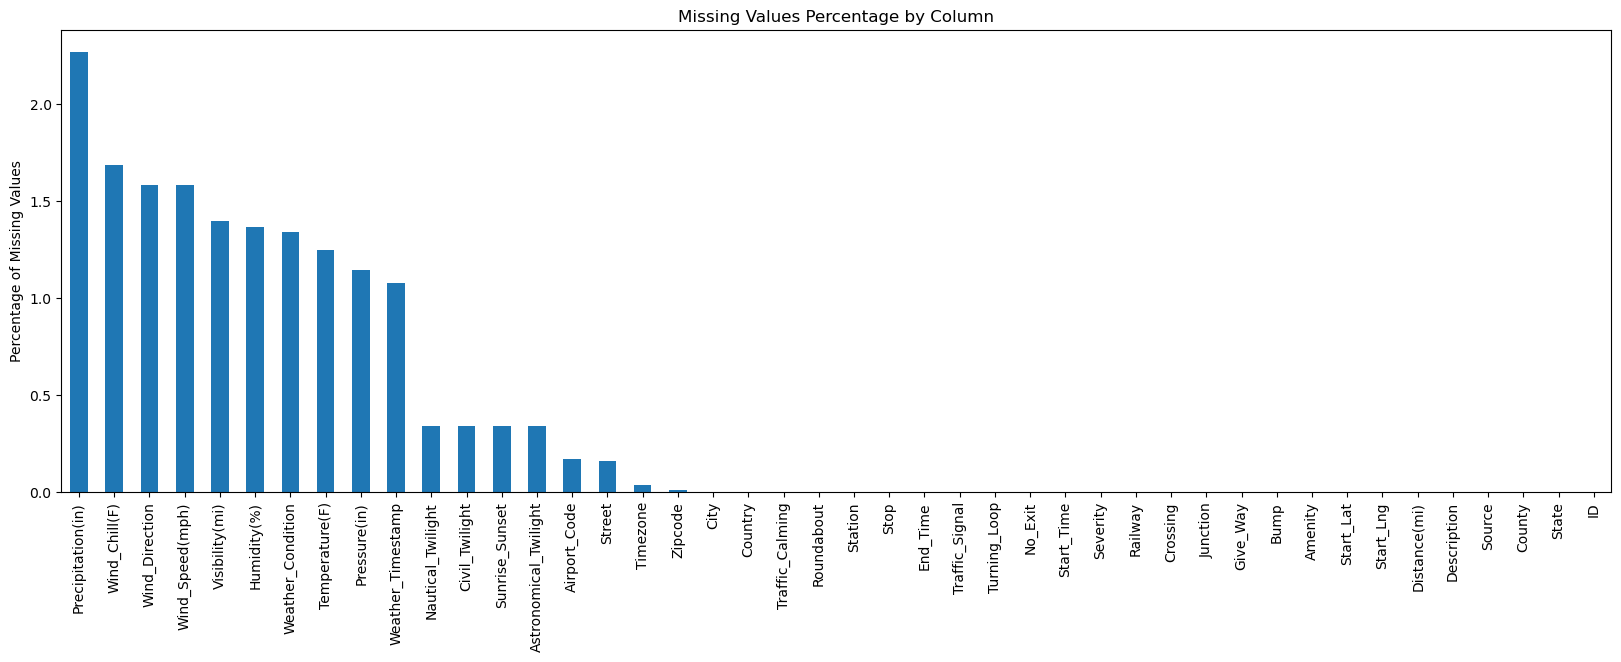

In [75]:
missing_summary.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_summary.plot(kind='bar', y='Missing Percentage', figsize=(20,6), legend=False)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Percentage by Column')

In [76]:
# Drop the row with too many missing values
df = df.dropna(thresh=len(df.columns) * 0.5)
df = df.reset_index(drop=True)

print(f"Data shape after dropping rows with >50% missing values: {df.shape}")


Data shape after dropping rows with >50% missing values: (166552, 44)


In [77]:
# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Fill missing values in categorical columns with "N/A"
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna("N/A")


In [78]:
# Observing the remaining missing values after cleaning and down-sampling
remaining_missing = df.isnull().sum()
remaining_missing_percentage = (remaining_missing / len(df)) * 100

remaining_missing_summary = pd.DataFrame({
    'Remaining Missing Count': remaining_missing,
    'Remaining Missing Percentage': remaining_missing_percentage
})
remaining_missing_summary.sort_values(by='Remaining Missing Percentage', ascending=False, inplace=True)

print(remaining_missing_summary)


                       Remaining Missing Count  Remaining Missing Percentage
ID                                           0                           0.0
Source                                       0                           0.0
Wind_Speed(mph)                              0                           0.0
Precipitation(in)                            0                           0.0
Weather_Condition                            0                           0.0
Amenity                                      0                           0.0
Bump                                         0                           0.0
Crossing                                     0                           0.0
Give_Way                                     0                           0.0
Junction                                     0                           0.0
No_Exit                                      0                           0.0
Railway                                      0                           0.0

In [79]:
df.to_csv("C:\\Users\\rosas\\OneDrive\\Desktop\\SML\\Project\\US_Accidents_Cleaned.csv", index=False)